# Anomaly detection
### Notebook used for iterative development of autoencoders. It was used to develop functions that are now part of the core sollution.
It is not part of the functional sollution.

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import streamlit as st
from pyod.models.auto_encoder import AutoEncoder
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# import sys
# import os

# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), "..")))

from config.constants_config import (
    BASE_TICKER_SET,
    BASE_START_DATE,
    BASE_TODAY_DATE,
    BASE_END_DATE,
)


from functions.data_manipulation_functions import (
                                                    load_and_transform_raw_data_full,
                                                    select_relevant_cols
                                                     )

from functions.data_exploration_functions import get_descriptive_statistics



from functions.anomaly_detection_functions import  plot_marginal_autoencode_anomaly, get_joint_autoencode_anomaly, plot_joint_autoencode_anomaly

plt.rcParams['figure.figsize'] = [8, 6]

BASE_TICKER_SET = sorted(BASE_TICKER_SET)

In [2]:
comb_df = load_and_transform_raw_data_full(BASE_TICKER_SET, BASE_START_DATE, BASE_END_DATE)
means, var, covs, corr = get_descriptive_statistics(comb_df, print_stats=False, start_date = BASE_START_DATE, end_date = BASE_TODAY_DATE, col_regexp_substring = r"interdaily_pct_change$")

comb_df.index = pd.to_datetime(comb_df.index)

[*********************100%***********************]  8 of 8 completed
c:\Users\stepa\Documents\fit_python\semestral\functions\data_manipulation_functions.py:259: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  joined_df["daily_riskless_yield"].fillna(


In [4]:
comb_df["COST_interdaily_pct_change"]

Date
2021-01-04    0.007207
2021-01-05   -0.008235
2021-01-06   -0.010165
2021-01-07   -0.008329
2021-01-08    0.004944
                ...   
2024-10-18    0.004290
2024-10-21   -0.002508
2024-10-22    0.002817
2024-10-23    0.003516
2024-10-24   -0.008963
Name: COST_interdaily_pct_change, Length: 959, dtype: float64

In [5]:
## Following code was authored by GPT
##


chosen_col = "COST_interdaily_pct_change"

returns = comb_df[chosen_col].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_returns = scaler.fit_transform(returns)

model = AutoEncoder() 

model.fit(scaled_returns)

anomaly_scores = model.decision_function(scaled_returns)
anomaly_labels =  model.predict(scaled_returns)

comb_df['Anomaly_Score'] = anomaly_scores
comb_df['Anomaly_Label'] = anomaly_labels

Training: 100%|██████████| 10/10 [00:00<00:00, 12.50it/s]


In [6]:
# def anomaly_detection_autoencode_single_stock(stock_returns: pd.Series):
#     """
#     Autoencoder anomaly detection for time serie of single stock returns
#     Core of the function coauthored by GPT
#     """

#     returns = stock_returns.values.reshape(-1, 1)

#     scaler = MinMaxScaler()
#     scaled_returns = scaler.fit_transform(returns)

#     # TODO Add model parameters
#     model = AutoEncoder(
#         hidden_neuron_list=[10, 2],
#         contamination=0.05,
#         epoch_num=20,
#     )

#     model.fit(scaled_returns)

#     anomaly_labels = model.predict(scaled_returns)

#     return anomaly_labels


# def plot_marginal_autoencode_anomaly(df: pd.DataFrame, col_regexp_substring:str=r"interdaily_pct_change$", show_plots:bool = True, show_plots_streamlit:bool = False):
#     """
#     Plots the marginal anomaly scores for the autoencoder model
#     """

#     selected_df = select_relevant_cols(df, col_regexp_substring=col_regexp_substring)

#     for col in selected_df.columns:
        
#         anomaly_labels = anomaly_detection_autoencode_single_stock(selected_df[col])

#         fig, ax = plt.subplots()
#         ax.plot(selected_df.index, selected_df[col], label="Anomaly Score")
#         ax.scatter(selected_df.index, selected_df[col], c = anomaly_labels, label="Anomaly Detected")
#         ax.set_title(f"Marginal Detected Anomalies for {col}")
#         ax.set_xlabel("Date")
#         ax.set_ylabel("Stock Return")
#         ax.legend()

#         if show_plots:
#             plt.show()
#         if show_plots_streamlit:
#             st.pyplot(fig)


        

    

Training: 100%|██████████| 20/20 [00:01<00:00, 15.55it/s]


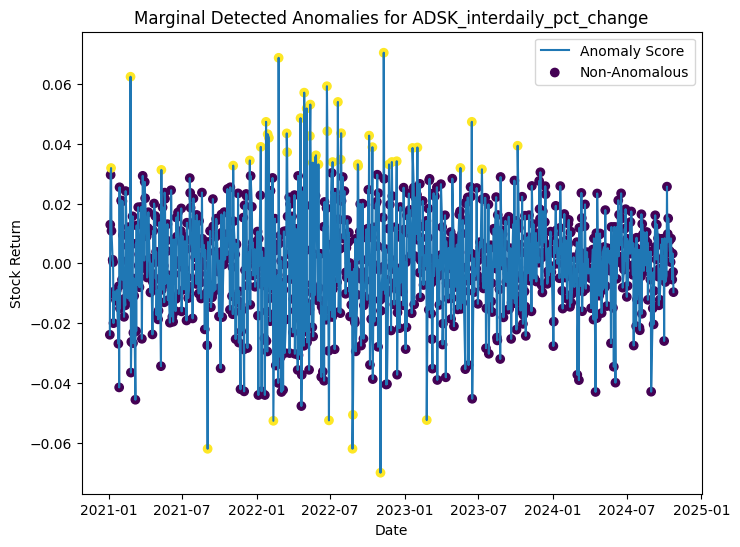

Training: 100%|██████████| 20/20 [00:01<00:00, 15.36it/s]


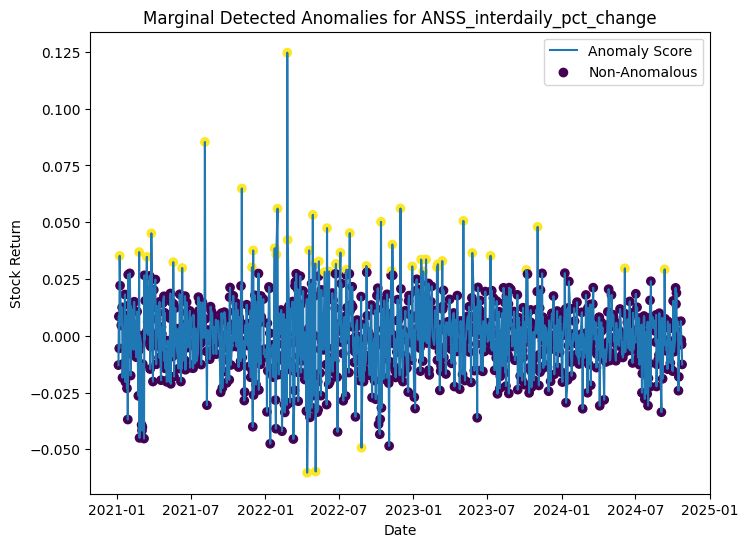

Training: 100%|██████████| 20/20 [00:01<00:00, 15.60it/s]


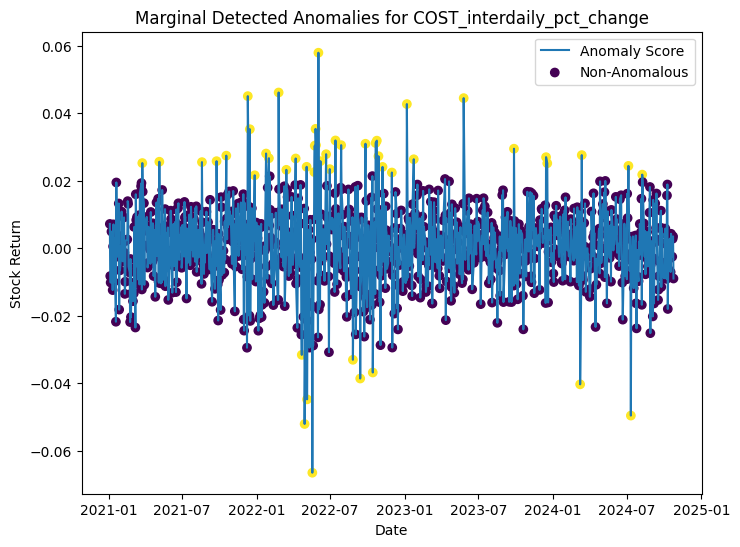

Training: 100%|██████████| 20/20 [00:01<00:00, 14.92it/s]


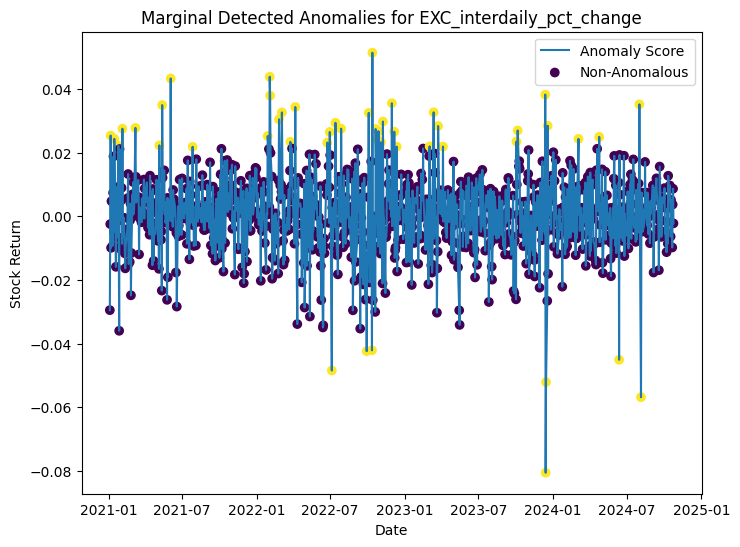

Training: 100%|██████████| 20/20 [00:01<00:00, 15.30it/s]


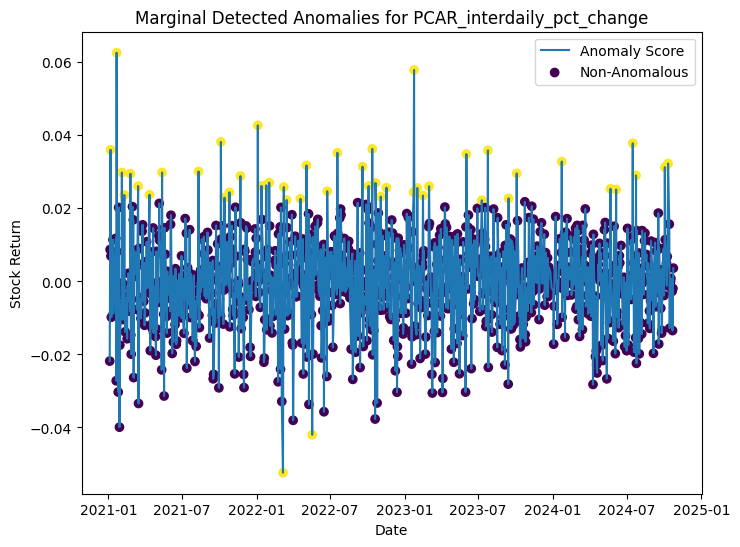

Training: 100%|██████████| 20/20 [00:01<00:00, 14.69it/s]


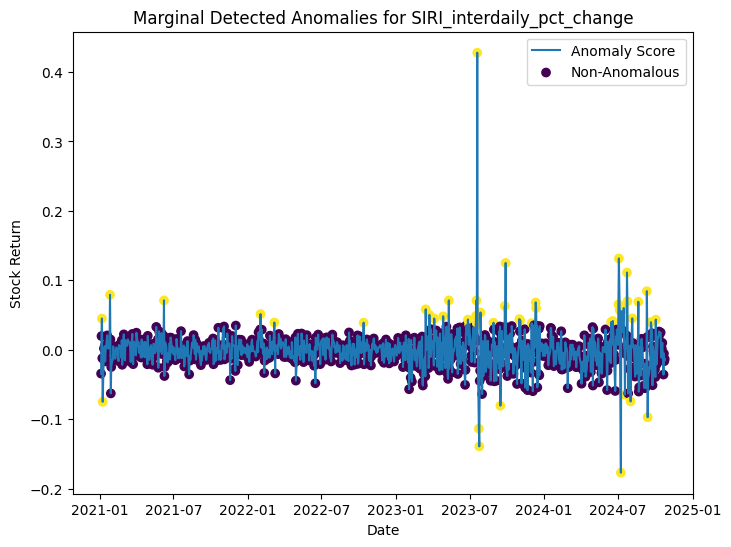

Training: 100%|██████████| 20/20 [00:01<00:00, 15.44it/s]


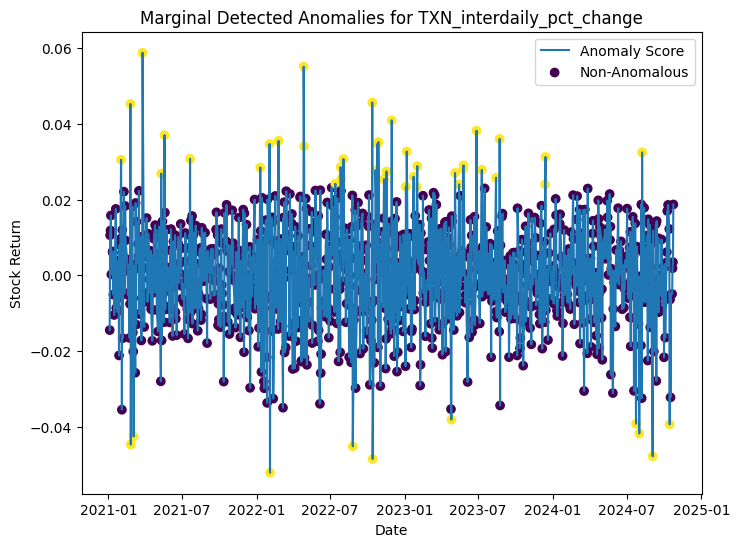

Training: 100%|██████████| 20/20 [00:01<00:00, 14.97it/s]


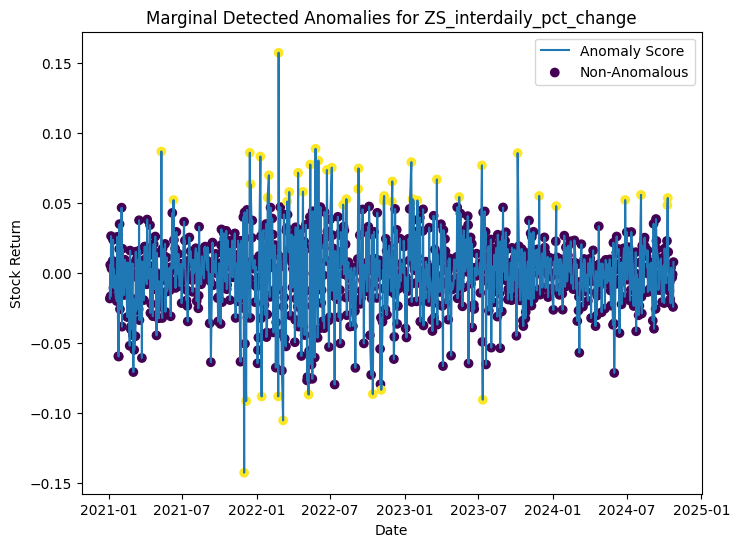

In [3]:
plot_marginal_autoencode_anomaly(comb_df, col_regexp_substring=r"interdaily_pct_change$")

In [24]:
# ## Folowing part was written with the assistence of GPT

# ## TODO: Split the following function into two functions, one for training the model and one for transforming passed data 
# def get_joint_autoencode_anomaly(df: pd.DataFrame, col_regexp_substring: str = r"interdaily_pct_change$", **kwargs) -> pd.DataFrame:
#     """
#     Train Autoencoder model on the returns data and return anomaly labels
#     """

#     returns_data = select_relevant_cols(df, col_regexp_substring=col_regexp_substring)


#     scaler = MinMaxScaler()
#     scaled_returns = scaler.fit_transform(returns_data)

    

#     model_input_dim = returns_data.shape[1]

#     ## Handle model kwargs
#     encoding_dim = kwargs.get("encoding_dim", 2)
#     hidden_layer_sizes = kwargs.get("hidden_layer_sizes", (32, 16))
#     activation = kwargs.get("activation", "relu")
#     num_epochs = kwargs.get("num_epochs", 20)
#     batch_size = kwargs.get("batch_size", 32)

#     #Define Model (use keras functional API)

#     input_layer = Input(shape=(model_input_dim,))

#     # Encoding layers
#     encoded = Dense(hidden_layer_sizes[0], activation=activation)(input_layer)
#     encoded = Dense(hidden_layer_sizes[1], activation=activation)(encoded)
#     encoded = Dense(encoding_dim, activation=activation)(encoded)

#     # Decoding layers
#     decoded = Dense(hidden_layer_sizes[1], activation=activation)(encoded)
#     decoded = Dense(hidden_layer_sizes[0], activation=activation)(decoded)
#     decoded = Dense(model_input_dim, activation="linear")(decoded)

#     # Autoencoder model
#     autoencoder = Model(input_layer, decoded)

#     # Compile model
#     autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

#     # Train model
#     autoencoder.fit(scaled_returns, scaled_returns, epochs=num_epochs, batch_size=batch_size, shuffle=True)


#     # Use predictions to get anomaly labels
    
#     reconstructed_data = autoencoder.predict(scaled_returns)

#     returns_reconstruction_error = np.abs(scaled_returns - reconstructed_data)

#     error_threshold = np.percentile(
#         returns_reconstruction_error,
#         95,
#     )
#     detected_anomalies = returns_reconstruction_error > error_threshold

#     anomaly_df = pd.DataFrame(
#         detected_anomalies, columns=returns_data.columns, index=returns.index)
    
#     return returns_data, anomaly_df


# def plot_joint_autoencode_anomaly(returns_data: pd.DataFrame, anomaly_df: pd.DataFrame,  **kwargs):
#     """
#     Plots the joint anomaly scores for the autoencoder model
#     """

#     # Handle kwargs
#     show_plots = kwargs.get("show_plots", True)
#     show_plots_streamlit = kwargs.get("show_plots_streamlit", False)

#     for col in returns_data.columns:
        
#         anomaly_labels = anomaly_df[col]
        

#         fig, ax = plt.subplots()
#         ax.plot(returns_data.index, returns_data[col], label="Returns")
#         ax.scatter(returns_data.index, returns_data[col], c = anomaly_labels, label="Anomaly/Normal")
#         ax.set_title(f"Marginal Detected Anomalies for {col}")
#         ax.set_xlabel("Date")
#         ax.set_ylabel("Stock Return")
#         ax.legend()

#         if show_plots:
#             plt.show()
#         if show_plots_streamlit:
#             st.pyplot(fig)    




    

In [4]:
returns_data, anomaly_df = get_joint_autoencode_anomaly(comb_df, col_regexp_substring=r"interdaily_pct_change$")

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1956
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0422 
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074 
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066 
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063 
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064 
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064 
Epoch

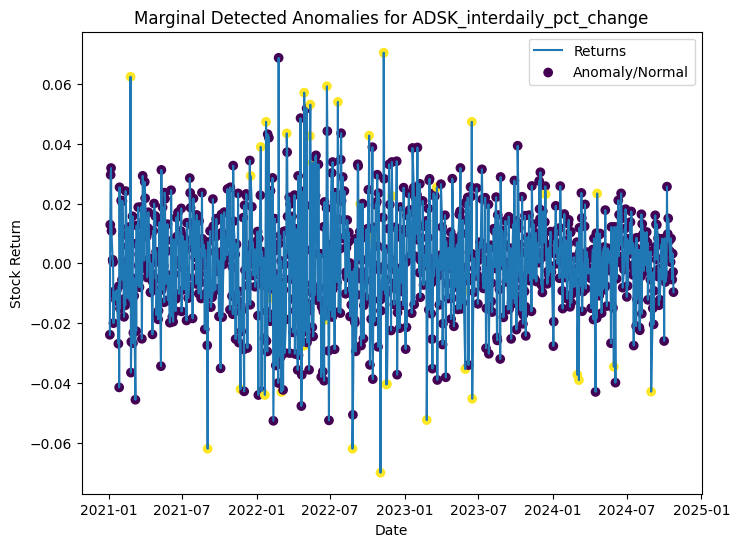

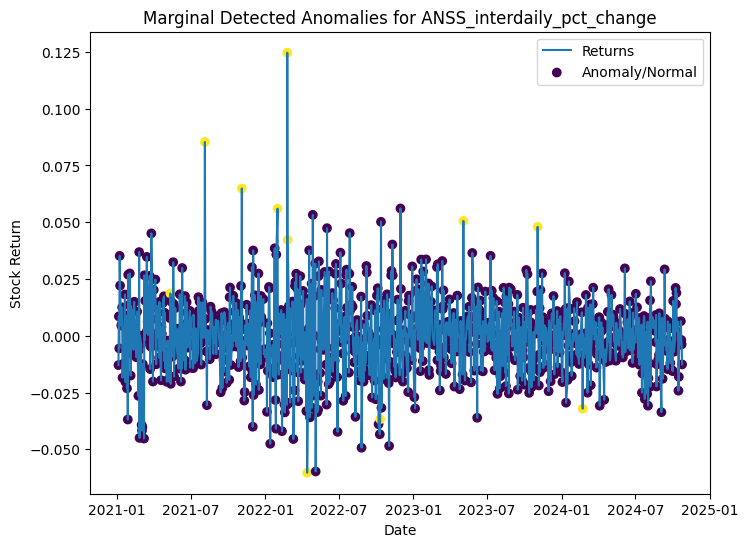

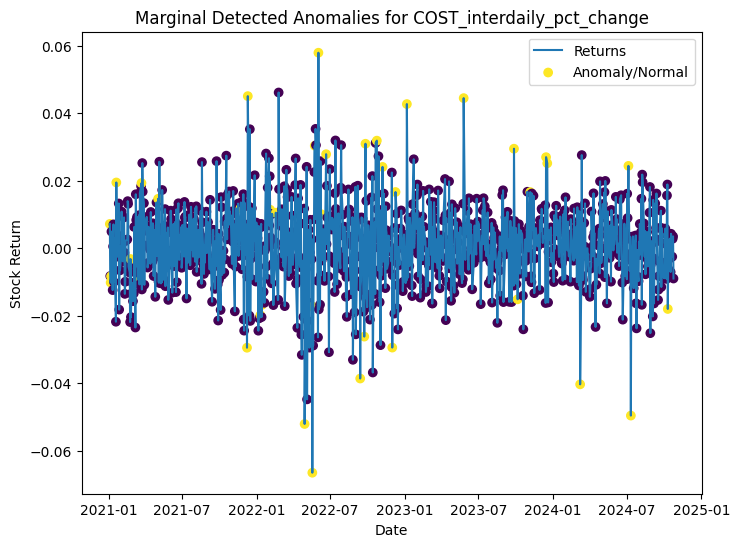

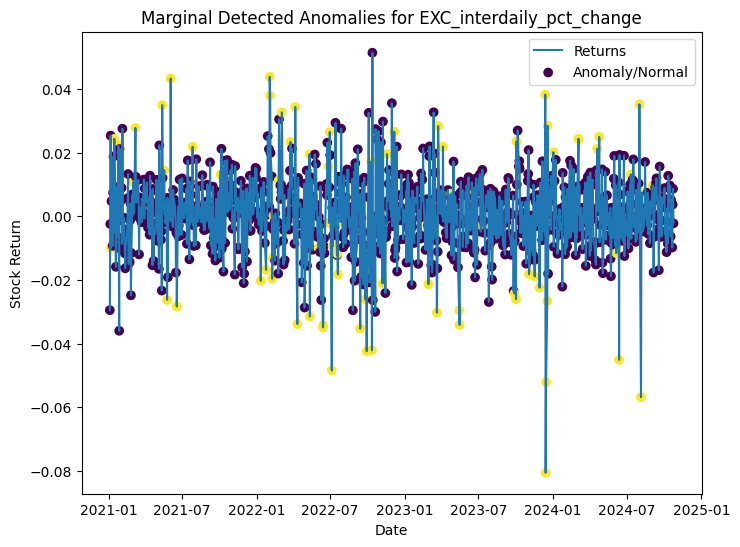

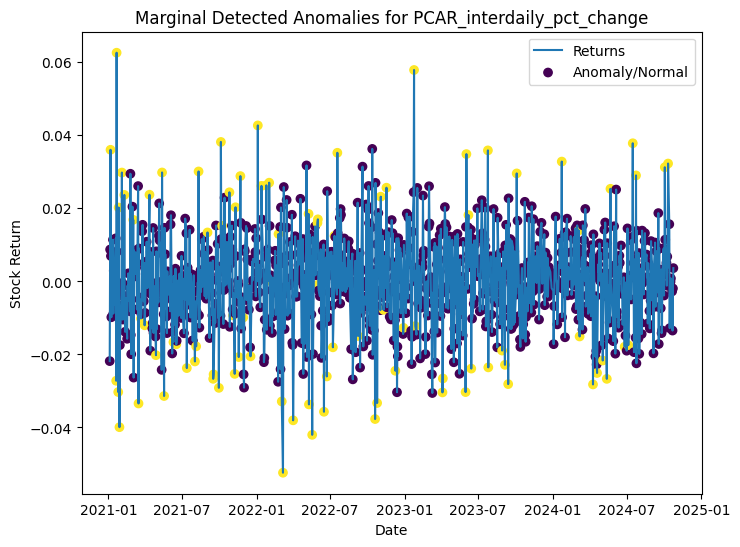

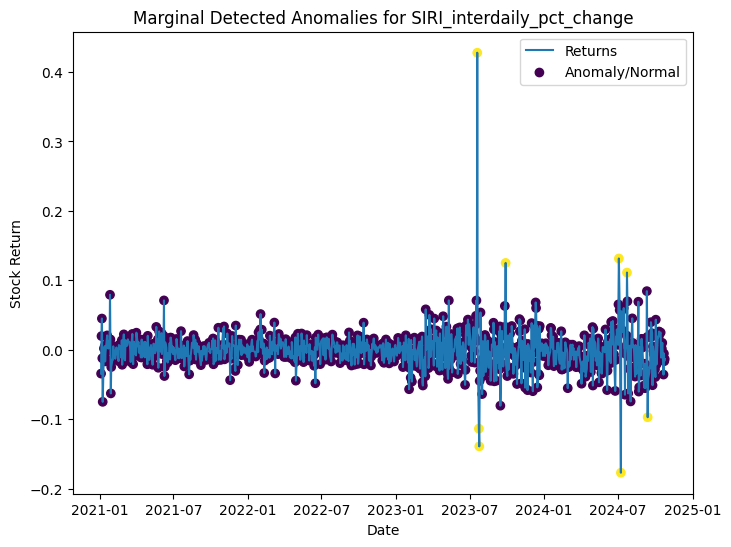

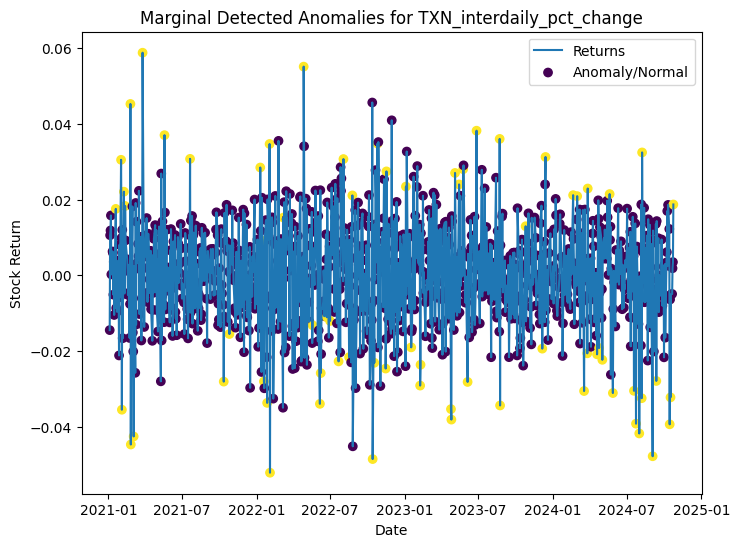

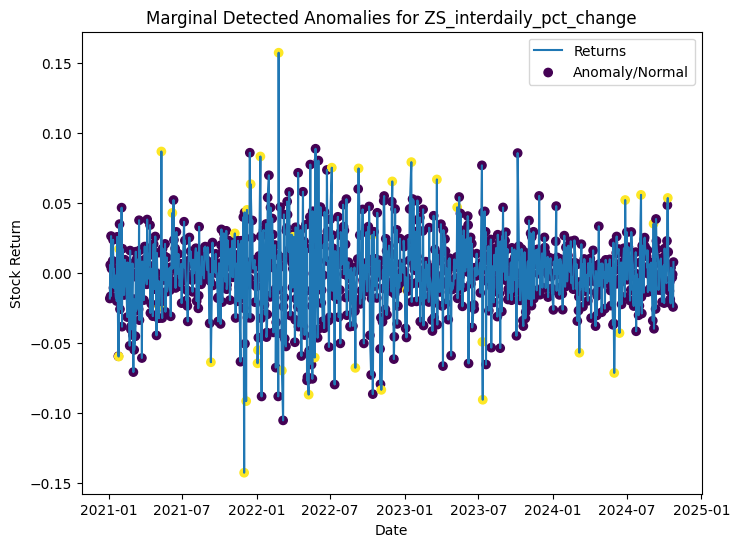

In [5]:
plot_joint_autoencode_anomaly(returns_data, anomaly_df)

In [14]:
# returns = select_relevant_cols(comb_df, col_regexp_substring=r"interdaily_pct_change$")

# scaler = MinMaxScaler()
# scaled_data= scaler.fit_transform(returns)

In [ ]:

# input_dim = scaled_data.shape[1]  # Number of features (columns in the data)
# encoding_dim = 4  # Latent space dimension (can be tuned)

# # Input layer
# input_layer = Input(shape=(input_dim,))

# # Encoding layers
# encoded = Dense(64, activation='relu')(input_layer)
# encoded = Dense(32, activation='relu')(encoded)
# encoded = Dense(encoding_dim, activation='relu')(encoded)

# # Decoding layers
# decoded = Dense(32, activation='relu')(encoded)
# decoded = Dense(64, activation='relu')(decoded)
# decoded = Dense(input_dim, activation='linear')(decoded)  # Output layer

# # Autoencoder model
# autoencoder = Model(inputs=input_layer, outputs=decoded)

# # Compile the model
# autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# # Step 3: Train the autoencoder
# autoencoder.fit(scaled_data, scaled_data, 
#                 epochs=20, 
#                 batch_size=32, 
#                 shuffle=True, 
#                 verbose=1)

# # Step 4: Use the autoencoder for reconstruction
# reconstructed_data = autoencoder.predict(scaled_data)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1486
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100 
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066 
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066 
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060 
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062 
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0058 
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 
Epoch

In [24]:
# returns_reconstruction_error = np.abs(scaled_returns - reconstructed_data)

# # Label errors jointly
# error_threshold = np.percentile(
#     returns_reconstruction_error,
#     95,
# )
# detected_anomalies = returns_reconstruction_error > error_threshold

# anomaly_df = pd.DataFrame(
#     detected_anomalies, columns=returns.columns, index=returns.index)




In [29]:
# def plot_joint_autoencode_anomaly(df: pd.DataFrame, col_regexp_substring:str=r"interdaily_pct_change$", show_plots:bool = True, show_plots_streamlit:bool = False):
#     """
#     Plots the marginal anomaly scores for the autoencoder model
#     """

#     selected_df = select_relevant_cols(df, col_regexp_substring=col_regexp_substring)

#     for col in selected_df.columns:
        
#         anomaly_labels = anomaly_df[col]
        

#         fig, ax = plt.subplots()
#         ax.plot(selected_df.index, selected_df[col], label="Anomaly Score")
#         ax.scatter(selected_df.index, selected_df[col], c = anomaly_labels, label="Anomaly/Normal")
#         ax.set_title(f"Marginal Detected Anomalies for {col}")
#         ax.set_xlabel("Date")
#         ax.set_ylabel("Stock Return")
#         ax.legend()

#         if show_plots:
#             plt.show()
#         if show_plots_streamlit:
#             st.pyplot(fig)

In [20]:
# plot_joint_autoencode_anomaly(comb_df, col_regexp_substring=r"interdaily_pct_change$")